In [65]:
import numpy as np
import pandas as pd
from numpy import isnan
import sklearn
from sklearn.impute import KNNImputer

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
import datetime

In [67]:
sklearn.__version__

'0.23.2'

In [68]:

data = pd.read_csv('OilAnalysis_vs_DaystoFailure.csv')

In [69]:
columns = ['compartsn', 'coolantid',  'oiladded', 'GC Fuel',
'GC Glycol'          ,     
'Color'       ,              
'S-Color'     ,              
'Colour Desc' ,              
'Appearance'  ,              
'Oil_contamin' ,             
'Precip_Amount' ,            
'Precip_Appear'  ,           
'Precip_Contam'   ,          
'Precip_Contam_Properties',  
'Odor'                     , 
'Foaming'                   ,
'pH Coolant'                ,
'Cond'                      ,
'MO4 raw'                   ,
'FPoint'                    ,
'Glycol'   ,
'BP',
'KF Water',
'NO2',
'Cap Inspect',
'Unnamed: 0']

In [70]:
data = data.drop(columns = columns)
data = data[data['DamageDelta'].notna()]

In [71]:
Engine1 = data[data.compart == 'Engine']


# Select the DataFrame

In [72]:
Engine1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 97 to 1100
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EquipmentNumber     63 non-null     float64
 1   EquipmentModel      63 non-null     object 
 2   EquipmentMake       63 non-null     object 
 3   compartid           63 non-null     object 
 4   compart             63 non-null     object 
 5   oiltypeid           63 non-null     object 
 6   oilgradeid          63 non-null     object 
 7   notesos             63 non-null     object 
 8   sampledate          63 non-null     object 
 9   oilhours            63 non-null     float64
 10  actual_fluid_hours  63 non-null     float64
 11  meterread           63 non-null     float64
 12  oilchanged          63 non-null     object 
 13  filterchanged       49 non-null     object 
 14  evalcode            63 non-null     object 
 15  Problem Solved      63 non-null     bool   
 16  Action 

In [73]:
data = Engine1

# Code Starts

In [74]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [75]:
A = categorical_data.values
column = categorical_data.columns

In [76]:
for i in range(len(column)):
    for j in range(A.shape[0]):
        if (A[j][i] == '-'):
            A[j][i] = np.nan

In [77]:
categorical_data1 = pd.DataFrame(data = A, columns = column)
categorical_data1.index = categorical_data.index

In [78]:
list11 = ['EquipmentModel',
 'EquipmentMake',
 'oilchanged',
 'filterchanged',
 'Problem Solved',
 'Action Taken',
 'Water',
 'compart',
 'oiltypeid',
 'oilgradeid',
 'evalcode']

In [79]:
list22 = ['V40',
 'V100',
 'VI',
 '4u',
 '6u',
 '14u',
 '21u',
 '38u',
 '70u',
 'Sliding',
 'Fatigue',
 'Non Metallic',
 'Fibers',
 'Total Part/ml']

In [80]:
cat_list22 = categorical_data1[list22]

In [81]:
list1 = []#more than 2
list2 = []#equal to 2
list0 = []# only one value
for i in categorical_data[list11].columns:
    if(len(categorical_data1[list11][i].unique()) == 2):
        list2.append(i)
    elif(len(categorical_data1[list11][i].unique()) == 1):
        list0.append(i)
    else:
        list1.append(i)

In [82]:
# list1
# list2
# list0

In [83]:
cat_list1 = categorical_data1[list2]# two values
cat_list21 = categorical_data1[list1]#multiple values


In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(cat_list1)
x_cat = imp.transform(cat_list1)
two_level = pd.DataFrame(data = x_cat, columns = cat_list1.columns)

In [85]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(cat_list21)
x_cat = imp.transform(cat_list21)
multiple_level = pd.DataFrame(data = x_cat, columns = cat_list21.columns)

In [86]:
two_level.index = categorical_data.index
multiple_level.index = categorical_data.index
cat_list22.index = categorical_data.index

### Missing Value

First the numeric Data

In [87]:
cat_list22 = cat_list22.drop(columns = ['V40', 'VI','4u', '6u', '14u', '21u', '38u', '70u', 'Sliding',
       'Fatigue', 'Non Metallic', 'Fibers', 'Total Part/ml'])

In [88]:
cat_list22.columns

Index(['V100'], dtype='object')

In [89]:
numeric_data1 = pd.concat([numeric_data, cat_list22], axis = 1)


In [90]:
X = numeric_data1.drop(columns = 'DamageDelta').values
y = numeric_data1['DamageDelta'].values

In [91]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(missing_values=np.nan, add_indicator=False,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
imputer.fit(X)
Xtrans = imputer.transform(X)

In [92]:
Xtrans.shape

(63, 37)

In [93]:
df_X = pd.DataFrame(data = Xtrans, columns = numeric_data1.drop(columns = 'DamageDelta').columns)
y1 = y.reshape(y.shape[0], 1)
df_Y = pd.DataFrame(data = y1, columns = ['DamageDelta'])
numeric_data2 = pd.concat([df_X, df_Y], axis = 1)

In [94]:
numeric_data2.index = numeric_data1.index
df_X.index = numeric_data1.index
df_Y.index = numeric_data1.index

### Outlier Detection

In [95]:
data = numeric_data2.drop(columns = 'DamageDelta')
af = data.columns

In [96]:
for i in af:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    data_ol = data[i][~((data[i] < (Q1 - 1.5 * IQR)) |(data[i] > (Q3 + 1.5 * IQR)))]
    data[i] = data_ol

In [97]:
X = data.values

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(missing_values=np.nan, add_indicator=False,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
imputer.fit(X)
Xtrans = imputer.transform(X)

In [99]:
column = data.columns
df_X = pd.DataFrame(data = Xtrans, columns = af)
y1 = y.reshape(y.shape[0], 1)
df_Y = pd.DataFrame(data = y1, columns = ['DamageDelta'])
numeric_data3 = pd.concat([df_X, df_Y], axis = 1)

In [100]:
numeric_data3.index = numeric_data.index

### Encoding of Categorical Values


In [101]:
two_level

,EquipmentMake,oilchanged,oiltypeid
97,EUCLID,True,CHEVRON DELO 400 LE
98,EUCLID,False,CHEVRON DELO 400 LE
109,EUCLID,False,CHEVRON DELO 400
116,EUCLID,True,CHEVRON DELO 400
124,EUCLID,False,CHEVRON DELO 400
...,...,...,...
1077,HITACHI,False,CHEVRON DELO 400 LE
1085,HITACHI,True,CHEVRON DELO 400 LE
1091,HITACHI,False,CHEVRON DELO 400 LE
1094,HITACHI,True,CHEVRON DELO 400 LE


In [102]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
two_level1 = two_level.apply(LabelEncoder().fit_transform)

In [103]:
two_level1.columns

Index(['EquipmentMake', 'oilchanged', 'oiltypeid'], dtype='object')

### Feature Selection for Numerical values

In [104]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [105]:
X = df_X
Y = df_Y


In [106]:
# scaler = StandardScaler()
# # scaler = MinMaxScaler(feature_range = (-3, 3))\
# # scaler = MaxAbsScaler()
# scaled = scaler.fit_transform(X)
# X = pd.DataFrame(data = scaled, columns = X.columns)

In [107]:
X.index = numeric_data3.index

In [108]:
A = X.values
A.shape

(63, 37)

<ipython-input-109-8e894b5ffbe5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.13201846 0.01751335 0.01403009 0.22045863 0.02392022 0.02831245
 0.00239385 0.00102642 0.01024516 0.         0.         0.01217891
 0.0509863  0.01049891 0.01499506 0.0159287  0.05062089 0.03778667
 0.01841605 0.04892268 0.03253939 0.         0.00773694 0.
 0.         0.00050169 0.         0.         0.03096659 0.02019591
 0.01897509 0.01950092 0.02359004 0.0210174  0.0024672  0.08955155
 0.02270449]


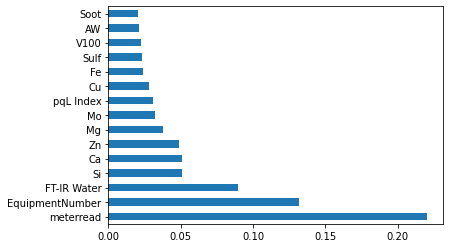

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k= 'all')
# apply feature selection
fit = fs.fit(X, Y)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top2 = featureScores.nsmallest(35,'Score')  #print 10 best features

/home/godwin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/godwin/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [111]:
top2

,Specs,Score
0,EquipmentNumber,0.025444
35,FT-IR Water,0.038900
20,Mo,0.105257
28,pqL Index,0.105448
29,Soot,0.109583
17,Mg,0.162556
36,V100,0.187253
12,Si,0.194576
4,Fe,0.206943
5,Cu,0.211210


In [153]:
a2 = np.array(top2.Specs)
xsel = X[['meterread',  'FT-IR Water']]

### Feature Selection for Categorical Data

#### First for Binary valued dataframes

In [113]:
from sklearn.feature_selection import f_classif

In [114]:
two_level1.head()

,EquipmentMake,oilchanged,oiltypeid
97,0,1,1
98,0,0,1
109,0,0,0
116,0,1,0
124,0,0,0


[0.21078994 0.10212168 0.68708837]


<ipython-input-115-955331fab0f0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(two_level1,Y)


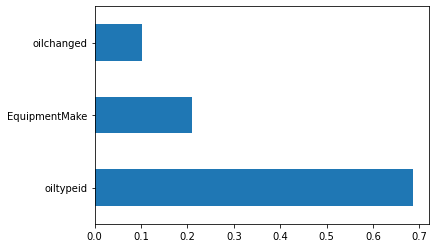

In [115]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(two_level1,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=two_level1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_classif, k= 'all')
# apply feature selection
fit = fs.fit(two_level1, Y)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(two_level1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top1 = featureScores.nsmallest(3,'Score')  #print 10 best features

/home/godwin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [117]:
top1

,Specs,Score
0,EquipmentMake,0.425066
2,oiltypeid,0.532523
1,oilchanged,0.561747


In [118]:
X_selected1 = two_level1[['EquipmentMake', 'oiltypeid']]

#### Now for multiple valued dataframes

In [119]:
multiple_level.columns

Index(['filterchanged', 'Water', 'evalcode'], dtype='object')

In [120]:
encoder=OneHotEncoder(sparse=False)
cat1 =  pd.DataFrame (encoder.fit_transform(multiple_level))

In [121]:
cat1.columns = encoder.get_feature_names(list1)

In [122]:
cat1.index = multiple_level.index

[5.06454497e-01 4.86593536e-01 4.56392193e-06 4.05681950e-06
 2.76128979e-03 6.91503323e-05 4.10935636e-03 3.54971706e-06]


<ipython-input-123-4316640cf02d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(cat1,Y)


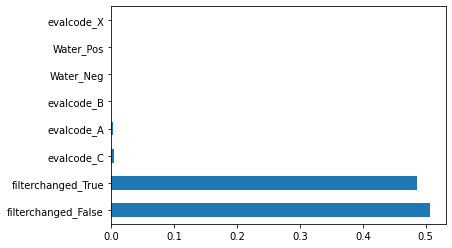

In [123]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(cat1,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cat1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [124]:
from sklearn.feature_selection import f_regression
skb = SelectKBest(score_func = f_regression, k = 'all')
fit = skb.fit(cat1, Y)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(cat1.columns)
best_features = pd.concat([dfcolumns, dfscores], axis = 1)
best_features.columns = ['Specs', 'Scores']
top3 = best_features.nsmallest(30, 'Scores')

/home/godwin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [125]:
top3

,Specs,Scores
0,filterchanged_False,0.210309
1,filterchanged_True,0.210309
4,evalcode_A,0.778783
6,evalcode_C,0.825855
2,Water_Neg,0.905253
3,Water_Pos,0.905253
7,evalcode_X,0.905253
5,evalcode_B,0.922203


In [204]:
multiple_sel = cat1[['filterchanged_False','filterchanged_True']]

In [234]:
final = pd.concat([xsel,numeric_data3.DamageDelta], axis = 1)

In [235]:
final

,meterread,FT-IR Water,DamageDelta
97,79364.0,18.000000,5.0
98,79141.0,13.000000,24.0
109,79864.0,16.000000,4.0
116,79623.0,17.789695,3.0
124,79490.0,17.000000,12.0
...,...,...,...
1077,52535.0,17.000000,18.0
1085,52200.0,18.000000,37.0
1091,52078.0,18.000000,45.0
1094,51736.0,17.000000,67.0


### Modelling

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [237]:
X = final.drop(columns = 'DamageDelta')
Y = final['DamageDelta']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

## Linear Regression

In [210]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [211]:
y_pred = regression.predict(X_test)

In [212]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1094,67.0,38.138921
1066,11.0,38.698365
97,5.0,28.638602
623,17.0,49.461449
138,36.0,27.420733
490,11.0,5.429606
225,95.0,66.681177
198,29.0,51.644169
394,69.0,42.583475
1091,45.0,42.904572


In [213]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 25.094045374115638
Mean Squared Error: 1045.0097286334951
Root Mean Squared Error: 32.3266102249137
R2 value: 0.16393779884342463


## Decision Trees

In [214]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [215]:
y_pred1 = dtr.predict(X_test)

In [216]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df

,Actual,Predicted
1094,67.0,50.0
1066,11.0,18.0
97,5.0,9.0
623,17.0,18.0
138,36.0,26.0
490,11.0,2.0
225,95.0,123.0
198,29.0,26.0
394,69.0,76.0
1091,45.0,34.0


In [217]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 score:', metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 13.923076923076923
Mean Squared Error: 332.61538461538464
Root Mean Squared Error: 18.23774614954887
R2 score: 0.7338903715626461


### SVM

In [218]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [219]:
y_pred2 = svr.predict(X_test)

In [220]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df

,Actual,Predicted
1094,67.0,34.000689
1066,11.0,33.997847
97,5.0,33.856080
623,17.0,33.999121
138,36.0,33.857458
490,11.0,33.998957
225,95.0,33.917312
198,29.0,33.893251
394,69.0,33.845285
1091,45.0,33.999633


In [221]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('Root Mean Squared Error:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 26.48605138623166
Mean Squared Error: 1278.686304758817
Root Mean Squared Error: 35.75872347775878
Root Mean Squared Error: -0.02301563062324785


### Random Forest

In [239]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [240]:
y_pred3 = rf.predict(X_test)

In [241]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df

,Actual,Predicted
1094,67.0,43.73
1066,11.0,18.58
97,5.0,18.61
623,17.0,27.25
138,36.0,22.49
490,11.0,26.66
225,95.0,90.91
198,29.0,36.62
394,69.0,70.01
1091,45.0,33.97


In [242]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R2 value:', metrics.r2_score(y_test, y_pred3))

Mean Absolute Error: 14.055000000000003
Mean Squared Error: 294.9829038461538
Root Mean Squared Error: 17.17506634182686
R2 value: 0.7639983158667132


In [175]:
rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300]}
rfcv = GridSearchCV(rf, rf_param_grid, cv = 5 , scoring = "r2", n_jobs = -1,verbose = 1)
rfcv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 263 out of 270 | elapsed:   13.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   13.9s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='r2', verbose=1)

In [176]:
y_pred3cv = rfcv.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3cv))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3cv))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3cv)))
print('R2 value:', metrics.r2_score(y_test, y_pred3cv))

Mean Absolute Error: 18.907829670329665
Mean Squared Error: 508.7942009362509
Root Mean Squared Error: 22.556466942680782
R2 value: 0.5929381441006153


In [151]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train, y_train)

ExtraTreesRegressor()

In [152]:
y_pred_ext = ext.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ext))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ext))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ext)))
print('R2 value:', metrics.r2_score(y_test, y_pred_ext))

Mean Absolute Error: 18.841538461538462
Mean Squared Error: 554.8137384615385
Root Mean Squared Error: 23.554484466053136
R2 value: 0.5561201176407933


In [177]:
import pickle

In [178]:
import pickle
pickle.dump(rf, open('Engine.pkl', 'wb'))

In [251]:
X_train

,meterread,FT-IR Water
527,51345.0,14.000000
1050,53472.0,15.371005
439,79790.0,14.000000
434,80003.0,18.000000
1077,52535.0,17.000000
1085,52200.0,18.000000
218,69837.0,18.000000
408,80775.0,16.000000
406,80853.0,16.000000
389,81116.0,19.061566


In [247]:
a = np.array([[51345, 14]])

In [248]:
# a = a.reshape(1, a.shape[0])
a.shape

(1, 2)

In [249]:
a

array([[51345,    14]])

In [250]:
rf.predict(a)

array([70.82])